In [121]:
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import f_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LassoCV

In [19]:
houses = pd.read_csv('data/train.csv')

In [3]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
houses.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

In [14]:
houses.isna().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [12]:
(houses.isna().sum() / 1460).sort_values(ascending=False)

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
MasVnrType     0.597260
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 81, dtype: float64

In [15]:
houses['MiscFeature'].value_counts()

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [26]:
del_col = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
houses = houses.drop(del_col, axis=1)

In [39]:
(houses.isna().sum() / 1460).sort_values(ascending=False)

LotFrontage     0.177397
GarageFinish    0.055479
GarageYrBlt     0.055479
GarageType      0.055479
GarageQual      0.055479
                  ...   
Heating         0.000000
HeatingQC       0.000000
MSZoning        0.000000
1stFlrSF        0.000000
has_garage      0.000000
Length: 77, dtype: float64

In [28]:
mask_na_masonry = houses['MasVnrType'].isna()
houses.loc[mask_na_masonry, 'is_masonry'] = 0
houses.loc[~mask_na_masonry, 'is_masonry'] = 1

In [32]:
houses = houses.drop(['MasVnrType'], axis=1)

In [33]:
mask_na_fireplace = houses['FireplaceQu'].isna()
houses.loc[mask_na_fireplace, 'has_fireplace'] = 0
houses.loc[~mask_na_fireplace, 'has_fireplace'] = 1
houses = houses.drop(['FireplaceQu'], axis=1)

In [37]:
houses = houses.drop(['Id'], axis=1)

In [38]:
mask_na_garage = houses['GarageCond'].isna()
houses.loc[mask_na_garage, 'has_garage'] = 0
houses.loc[~mask_na_garage, 'has_garage'] = 1

In [23]:
houses.dropna(axis=1)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [69]:
houses[['YearBuilt', 'YearRemodAdd', 'YrSold']]
houses['AgeSinceRemod'] = houses['YrSold'] - houses['YearRemodAdd']
houses.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,is_masonry,has_fireplace,has_garage,AgeSinceRemod
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2,2008,WD,Normal,208500,1.0,0.0,1.0,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,5,2007,WD,Normal,181500,0.0,1.0,1.0,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,9,2008,WD,Normal,223500,1.0,1.0,1.0,6
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,2,2006,WD,Abnorml,140000,0.0,1.0,1.0,36
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,12,2008,WD,Normal,250000,1.0,1.0,1.0,8


In [66]:
houses.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
has_fireplace    0.471908
Fireplaces       0.466929
BsmtFinSF1       0.386420
is_masonry       0.367456
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
has_garage       0.236832
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr

<Axes: >

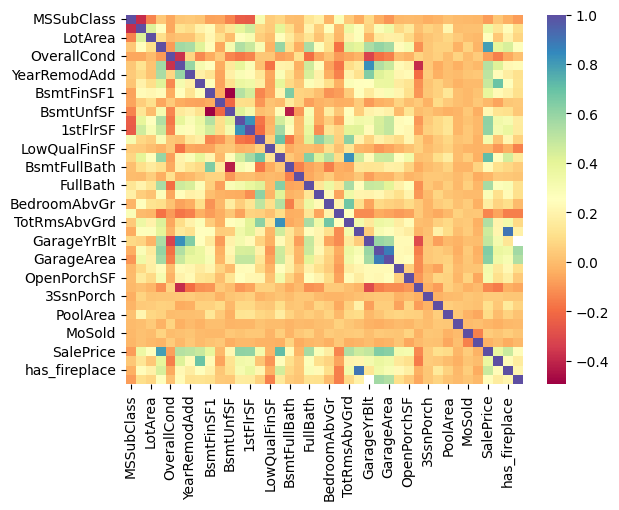

In [45]:
sns.heatmap(houses.corr(numeric_only=True), cmap='Spectral')

# Criar modelo

In [55]:
#houses.info()
houses['MSSubClass'] = houses['MSSubClass'].astype(str)

In [57]:
houses.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [62]:
houses.select_dtypes(include='object').columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [88]:
cat_vars = ['OverallQual', 'is_masonry', 'has_fireplace']
num_vars = ['AgeSinceRemod', 'GrLivArea', '1stFlrSF', 'GarageCars', 'FullBath', 'TotRmsAbvGrd']

X = houses[cat_vars + num_vars]
y = np.log(houses['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Numerical Pipeline
pt = PowerTransformer()
sca = StandardScaler()
pca = PCA()
lista_etapas = [("POWER_TRANS", pt), ("STD_SCALER", sca), ("PCA", pca)]
num_pipeline = Pipeline(lista_etapas)

# Categorical Pipeline
ohe = OneHotEncoder(drop='first', min_frequency=0.05, handle_unknown='infrequent_if_exist')
cat_pipeline = Pipeline([("OHE", ohe)])

# Preprocessing Pipeline
preprocessing_pipeline = ColumnTransformer([('NUM', num_pipeline, num_vars), ('CAT', cat_pipeline, cat_vars)])

# Complete Pipeline
rf = RandomForestRegressor()
model = Pipeline([('PREPROCESSING', preprocessing_pipeline), ('RANDOM FOREST', rf)])
model

Pipeline(steps=[('PREPROCESSING',
                 ColumnTransformer(transformers=[('NUM',
                                                  Pipeline(steps=[('POWER_TRANS',
                                                                   PowerTransformer()),
                                                                  ('STD_SCALER',
                                                                   StandardScaler()),
                                                                  ('PCA',
                                                                   PCA())]),
                                                  ['AgeSinceRemod', 'GrLivArea',
                                                   '1stFlrSF', 'GarageCars',
                                                   'FullBath',
                                                   'TotRmsAbvGrd']),
                                                 ('CAT',
                                                  Pipeline(steps=[('OHE',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='infrequent_if_exist',
                                                                                 min_frequency=0.05))]),
                                                  ['OverallQual', 'is_masonry',
                                                   'has_fireplace'])])),
                ('RANDOM FOREST', RandomForestRegressor())])

In [89]:
# GridSearch
dict_hiperparam = {
    'RANDOM FOREST__n_estimators': [100, 200, 500, 1000],
    'RANDOM FOREST__max_depth': [2, 5, 10, 32],
    'PREPROCESSING__NUM__PCA__n_components': range(1, 7)
}

opt_model = GridSearchCV(model, dict_hiperparam, cv=5, n_jobs=3)
opt_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('PREPROCESSING',
                                        ColumnTransformer(transformers=[('NUM',
                                                                         Pipeline(steps=[('POWER_TRANS',
                                                                                          PowerTransformer()),
                                                                                         ('STD_SCALER',
                                                                                          StandardScaler()),
                                                                                         ('PCA',
                                                                                          PCA())]),
                                                                         ['AgeSinceRemod',
                                                                          'GrLivArea',
                                                                          '1stFlrSF',
                                                                          'GarageCars',
                                                                          'FullBath',
                                                                          'TotRmsAbvGrd']),
                                                                        ('CAT',
                                                                         Pipeline(steps=[('OHE',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='infrequent_if_exist',
                                                                                                        min_frequency=0.05))]),
                                                                         ['OverallQual',
                                                                          'is_masonry',
                                                                          'has_fireplace'])])),
                                       ('RANDOM FOREST',
                                        RandomForestRegressor())]),
             n_jobs=3,
             param_grid={'PREPROCESSING__NUM__PCA__n_components': range(1, 7),
                         'RANDOM FOREST__max_depth': [2, 5, 10, 32],
                         'RANDOM FOREST__n_estimators': [100, 200, 500, 1000]})

In [90]:
y_pred = opt_model.predict(X_test)

In [116]:
from sklearn.metrics import mean_squared_error

In [117]:
rmse = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))
mean = np.mean(np.exp(y_test))

36451.219529508715

In [119]:
rmse / np.mean(np.exp(y_test))

0.20517350926264627

In [139]:
houses.select_dtypes(include='number').isna().sum().sort_values(ascending=False).index

Index(['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'ScreenPorch', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'PoolArea', 'TotRmsAbvGrd', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'is_masonry', 'has_fireplace', 'has_garage', 'Fireplaces',
       'KitchenAbvGr', 'LotArea', 'TotalBsmtSF', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       '1stFlrSF', 'BedroomAbvGr', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'AgeSinceRemod'],
      dtype='object')

In [149]:
X = houses[['ScreenPorch', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'PoolArea', 'TotRmsAbvGrd', 'MiscVal', 'MoSold', 'YrSold',
       'is_masonry', 'has_fireplace', 'has_garage', 'Fireplaces',
       'KitchenAbvGr', 'LotArea', 'TotalBsmtSF', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       '1stFlrSF', 'BedroomAbvGr', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'AgeSinceRemod']]
y = np.log(houses['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)
las_fit = LassoCV(cv=5)
las_fit.fit(scaler.transform(X_train), np.exp(y_train))
y_pred_las = las_fit.predict(scaler.transform(X_test))

In [150]:
coef_lin = pd.DataFrame(
    np.round(las_fit.coef_, 2), 
    index=X_train.columns, 
    columns=["lasso_fit"]
)

In [157]:
cat_vars + num_vars

['OverallQual',
 'is_masonry',
 'has_fireplace',
 'AgeSinceRemod',
 'GrLivArea',
 '1stFlrSF',
 'GarageCars',
 'FullBath',
 'TotRmsAbvGrd']

In [156]:
coef_lin.sort_values(by='lasso_fit', ascending=False)

,lasso_fit
OverallQual,27738.34
GrLivArea,25338.80
GarageCars,8799.61
BsmtFinSF1,5405.69
1stFlrSF,4654.48
YearBuilt,3614.76
TotalBsmtSF,2720.27
LotArea,2713.76
Fireplaces,1802.37
BsmtFullBath,1746.03


In [167]:
coef_lin.sort_values(by='lasso_fit', ascending=False).index

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'BsmtFinSF1', '1stFlrSF',
       'YearBuilt', 'TotalBsmtSF', 'LotArea', 'Fireplaces', 'BsmtFullBath',
       'WoodDeckSF', 'GarageArea', 'BsmtFinSF2', '2ndFlrSF', 'BsmtUnfSF',
       'BedroomAbvGr', 'LowQualFinSF', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'YearRemodAdd', 'ScreenPorch', 'OverallCond', 'has_garage',
       'has_fireplace', 'is_masonry', 'YrSold', 'MoSold', 'MiscVal',
       'TotRmsAbvGrd', 'PoolArea', '3SsnPorch', 'EnclosedPorch', 'OpenPorchSF',
       'KitchenAbvGr', 'AgeSinceRemod'],
      dtype='object')

In [183]:
cat_vars = ['OverallQual', 'is_masonry']
num_vars = ['AgeSinceRemod', 'GrLivArea', '1stFlrSF', 'GarageCars', 'FullBath', 'TotRmsAbvGrd', 'BsmtFinSF1', 'YearBuilt', 'TotalBsmtSF', 'LotArea', 'Fireplaces', 'BsmtFullBath',
            'WoodDeckSF', 'GarageArea', 'KitchenAbvGr']

X = houses[cat_vars + num_vars]
y = np.log(houses['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Numerical Pipeline
pt = PowerTransformer()
sca = StandardScaler()
pca = PCA()
lista_etapas = [("POWER_TRANS", pt), ("STD_SCALER", sca), ("PCA", pca)]
num_pipeline = Pipeline(lista_etapas)

# Categorical Pipeline
ohe = OneHotEncoder(drop='first', min_frequency=0.05, handle_unknown='infrequent_if_exist')
cat_pipeline = Pipeline([("OHE", ohe)])

# Preprocessing Pipeline
preprocessing_pipeline = ColumnTransformer([('NUM', num_pipeline, num_vars), ('CAT', cat_pipeline, cat_vars)])

# Complete Pipeline
rf = RandomForestRegressor()
model = Pipeline([('PREPROCESSING', preprocessing_pipeline), ('RANDOM FOREST', rf)])

# GridSearch
dict_hiperparam = {
    'RANDOM FOREST__n_estimators': [100, 200, 500, 1000],
    'RANDOM FOREST__max_depth': [2, 5, 10, 32],
    'PREPROCESSING__NUM__PCA__n_components': range(1, len(num_vars), 2)
}

opt_model = GridSearchCV(model, dict_hiperparam, cv=5, n_jobs=3)
opt_model.fit(X_train, y_train)

In [173]:
y_pred = opt_model.predict(X_test)

In [175]:
np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))

50364.88151146819

In [180]:
houses['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64